### Import Libraries and their associated methods

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
digits = load_digits()

In [4]:
# Determing the total number of images and labels
print("Image Data shape", digits.data.shape)
print("Label Data shape", digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


### Displaying some of the images and labels

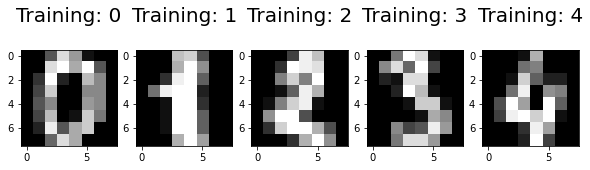

In [9]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize =20)

### Dividing the dataset into Training and Test set

In [10]:
x_train, x_test,y_train, y_test= train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [11]:
print(x_train.shape)

(1383, 64)


In [12]:
print(y_train.shape)

(1383,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(414, 64)
(414,)


### Import the Logistic Regression model

In [15]:
from sklearn.linear_model import LogisticRegression

### Making an instance of the model and training it

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting the output of the first element of the test set

In [18]:
print(lr.predict(x_test[0].reshape(1,-1)))

[4]


### Predicting the entire dataset

In [21]:
predictions= (lr.predict(x_test))

### Determinng the accuracy of the model

In [23]:
score=lr.score(x_test,y_test)
print(score)

0.9516908212560387


### Representing the confusion matrix in a heatmap

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score:  0.9516908212560387')

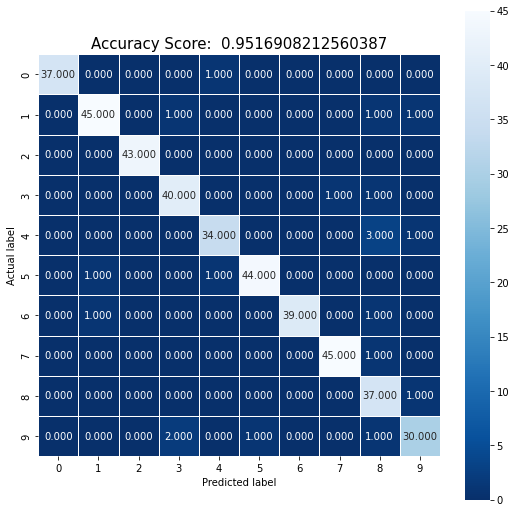

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title= 'Accuracy Score:  {0}'.format(score)
plt.title(all_sample_title, size=15)

### Samples of Predicted digits

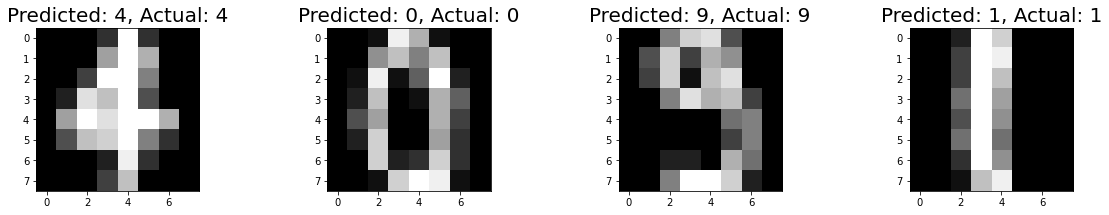

In [30]:
index= 0
classifiedIndex= []
for predict, actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong],y_test[wrong]), fontsize=20)